<a href="https://colab.research.google.com/github/PrachitiSParulekar/Customer-Purchase-Prediction-System-using-KNN/blob/main/Customer_Purchase_Prediction_System_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mall-customers' dataset.
Path to dataset files: /kaggle/input/mall-customers


In [ ]:
import os
print(os.listdir(path))

['Mall_Customers.csv']


In [ ]:
customer_data = os.path.join(path, 'Mall_Customers.csv')


In [ ]:
df = pd.read_csv(customer_data)

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


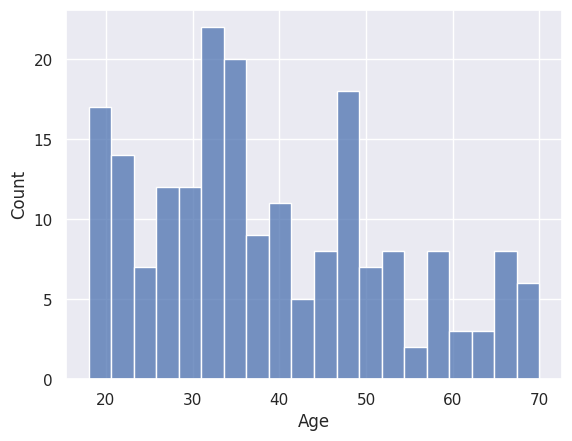

In [ ]:
sns.histplot(df['Age'], bins=20)
plt.show()

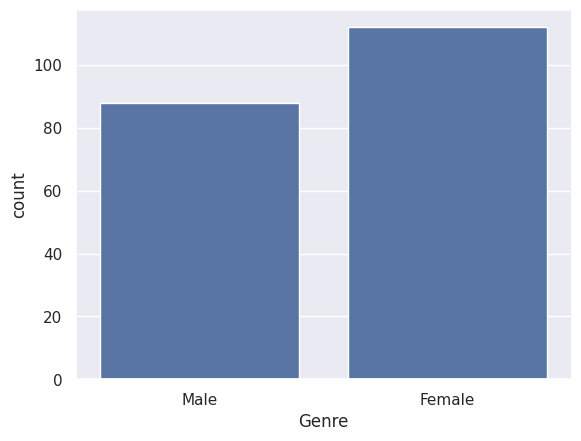

In [ ]:
sns.countplot(x='Genre', data=df)
plt.show()

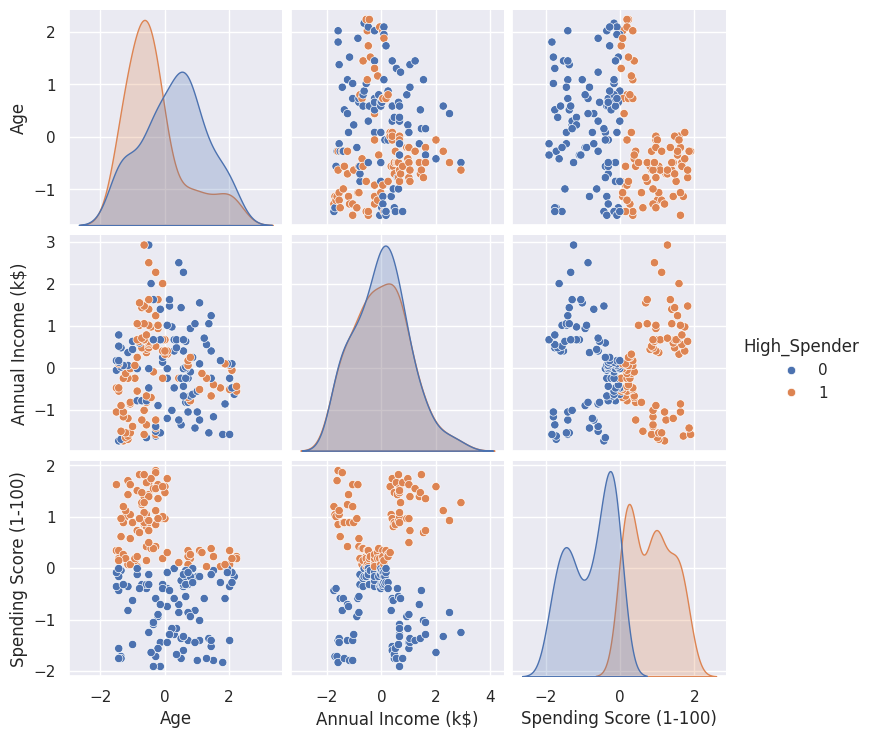

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'High_Spender']], hue='High_Spender', diag_kind='kde')
plt.show()

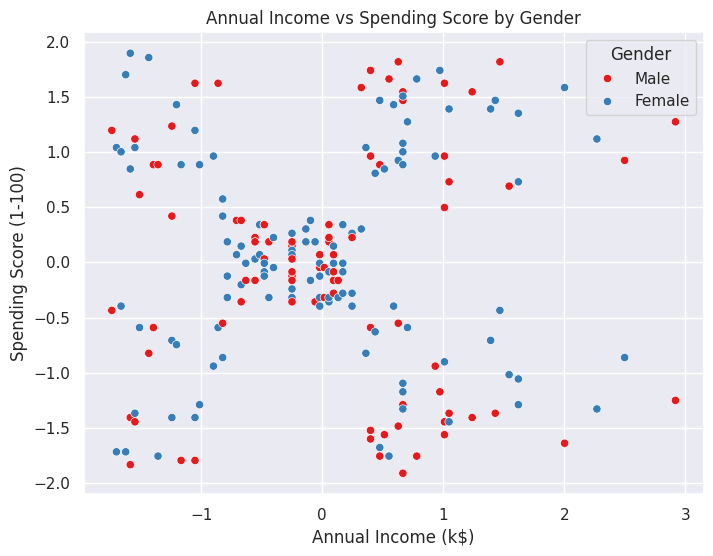

In [ ]:
# Annual Income vs Spending Score scatter plot colored by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='Set1')
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[features] = scaler.fit_transform(df[features])
df[features].head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
# Create a binary target (example: spending score > median as high spender)
median_score = df['Spending Score (1-100)'].median()
df['High_Spender'] = np.where(df['Spending Score (1-100)'] > median_score, 1, 0)

# Features - already scaled
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['High_Spender']

from sklearn.model_selection import train_test_split

# Split data 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best K: {'n_neighbors': 1}
Best CV Score: 0.9


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_k = grid.best_params_['n_neighbors']
knn_weighted = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Weighted KNN Accuracy:", accuracy_score(y_test, y_pred_weighted))

Weighted KNN Accuracy: 0.9


both knn works the same

In [ ]:
y_pred_best = knn_best.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy with Best K=1:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Test Accuracy with Best K=1: 0.9
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.89      0.89      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

[[29  3]
 [ 3 25]]


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=1)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Choosing the Annual Income Column & Spending Score column

In [ ]:
X = df.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

choosing the number of clusters
wcss within cluster sum of squares

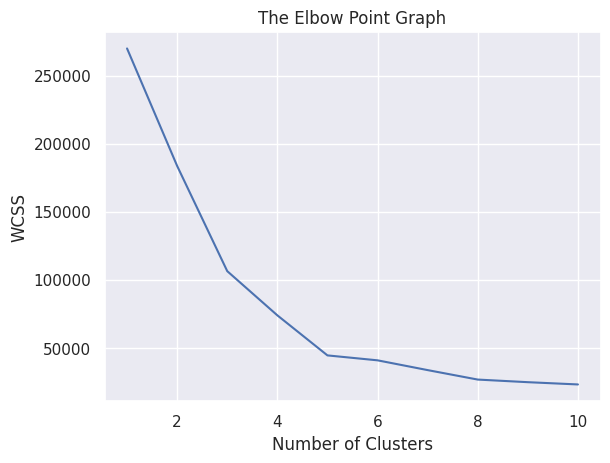

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

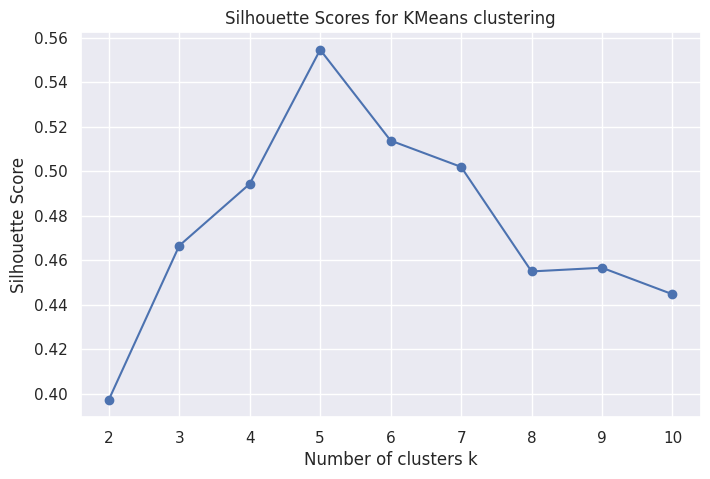

Best k by silhouette score: 5 with score 0.555


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # or full selected features

# Run silhouette scores for different k values around your choice (e.g. 2-10)
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette scores to visualize stability
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans clustering')
plt.show()

print(f'Best k by silhouette score: {K_range[np.argmax(silhouette_scores)]} with score {max(silhouette_scores):.3f}')


optimum no od clusters = 5
training the k mean clustering model

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


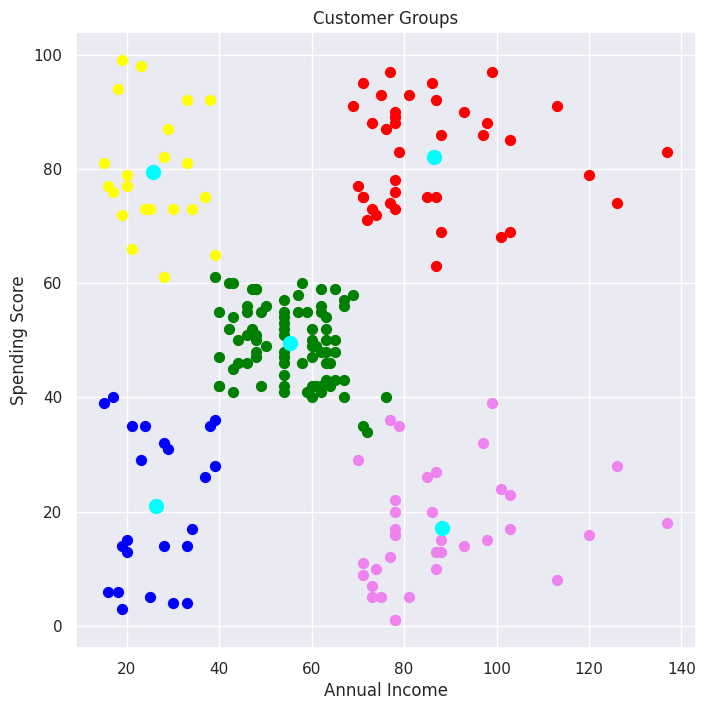

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Not High Spender', 'High Spender'],
    mode='classification'
)

# Pick an instance to explain
i = 0

# Define a wrapper function for predict_proba
def predict_fn(x):
  # Convert the input array back to a DataFrame with feature names
  x_df = pd.DataFrame(x, columns=X_train.columns)
  return knn_weighted.predict_proba(x_df)


exp = explainer.explain_instance(X_test.iloc[[i]].values[0], predict_fn, num_features=3)

# Display explanation
exp.show_in_notebook(show_table=True)